In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set global visualization parameters
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
file_path = 'C:\\Users\\SC\\Desktop\\WINHMS Data Mining\\Data\\Sales Executive Dec.xls'
# Column names based on the report layout
cols = ['Empty', 'Executive', 'Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
df_sales = pd.read_excel(file_path, skiprows=4, names=cols)

print("Libraries loaded and Sales Executive data imported.")

Libraries loaded and Sales Executive data imported.


In [2]:
# 1. Drop unnecessary empty columns and rows
df_sales = df_sales.drop(columns=['Empty']).dropna(subset=['Executive'])

# 2. Filter out systemic rows like 'Not Defined', 'Total', or 'Grand Total'
df_sales = df_sales[~df_sales['Executive'].str.contains('Total|Grand Total|Not Defined', case=False, na=False)]

# 3. Convert numeric columns for analysis
numeric_cols = ['Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
for col in numeric_cols:
    df_sales[col] = pd.to_numeric(df_sales[col], errors='coerce').fillna(0)

# 4. Filter for active executives (Revenue > 0)
df_active = df_sales[df_sales['Room_Revenue'] > 0].copy()

print(f"Cleaned {len(df_active)} active Sales Executives for analysis.")
df_active.head()

Cleaned 9 active Sales Executives for analysis.


,Executive,Nights,Occupancy_Pct,Pax,Room_Revenue,Revenue_Pct,ARR,ARP
1,Amartya,306.0,13.19,451.0,868450.00,11.15,2838.07,1925.61
2,Dinesh Kaushal,352.0,15.17,432.0,1220074.72,15.67,3466.12,2824.25
3,General Manager,4.0,0.17,8.0,61262.85,0.79,15315.71,7657.86
4,Jayant Joglekar,8.0,0.34,8.0,28000.00,0.36,3500.00,3500.00
5,Jitesh Thakur,109.0,4.70,192.0,509626.51,6.55,4675.47,2654.30


C:\Users\SC\AppData\Local\Temp\ipykernel_2064\1351819975.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_rev, x='Room_Revenue', y='Executive', palette='viridis')


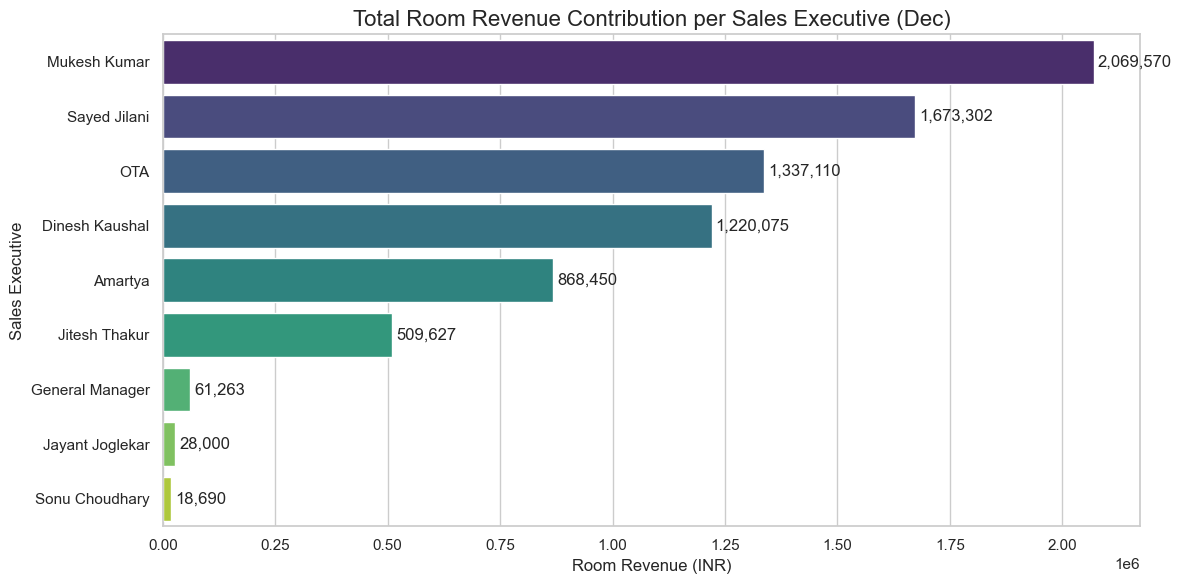

In [3]:
# Sort by Room Revenue to identify top earners
df_rev = df_active.sort_values(by='Room_Revenue', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_rev, x='Room_Revenue', y='Executive', palette='viridis')
plt.title('Total Room Revenue Contribution per Sales Executive (Dec)', fontsize=16)
plt.xlabel('Room Revenue (INR)', fontsize=12)
plt.ylabel('Sales Executive', fontsize=12)

# Adding value labels for clarity
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. TOP PERFORMERS: Mukesh Kumar and Dinesh Kaushal are the primary revenue drivers, significantly outpacing the rest of the team.
#### 2. REVENUE SKEW: A large portion of the monthly revenue is generated by the top 3-4 executives, indicating a high reliance on specific portfolios.
#### 3. GROWTH POTENTIAL: Executives with lower revenue contributions might be handling smaller accounts or new territories that require more support or lead generation.

C:\Users\SC\AppData\Local\Temp\ipykernel_2064\2565644433.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_nights, x='Nights', y='Executive', palette='magma')


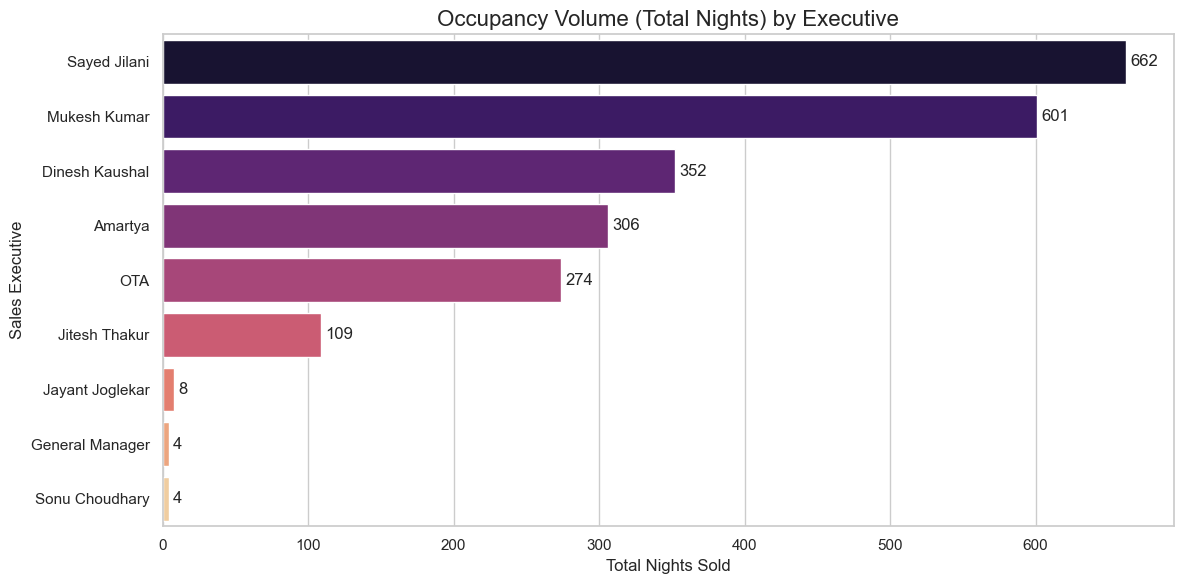

In [4]:
# Sort by Nights to see who drives the most volume
df_nights = df_active.sort_values(by='Nights', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_nights, x='Nights', y='Executive', palette='magma')
plt.title('Occupancy Volume (Total Nights) by Executive', fontsize=16)
plt.xlabel('Total Nights Sold', fontsize=12)
plt.ylabel('Sales Executive', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. VOLUME LEADERS: Mukesh Kumar leads in volume with 601 nights, acting as the main "occupancy anchor" for the hotel.
#### 2. WORKLOAD DISTRIBUTION: The high number of nights for the top performers suggests they are managing high-volume corporate or crew accounts.
#### 3. OPERATIONAL IMPACT: Executives driving the most nights have the highest impact on housekeeping and front office operations.

C:\Users\SC\AppData\Local\Temp\ipykernel_2064\970856476.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_arr, x='ARR', y='Executive', palette='flare')


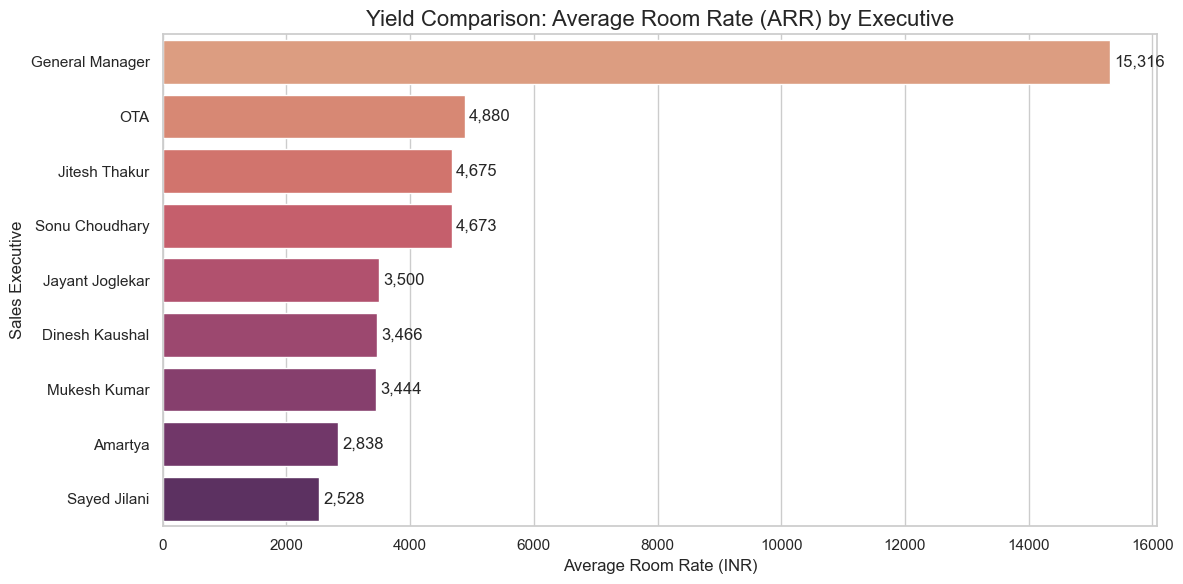

In [5]:
# Sort by ARR to see who brings in the highest quality (highest rate) bookings
df_arr = df_active.sort_values(by='ARR', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_arr, x='ARR', y='Executive', palette='flare')
plt.title('Yield Comparison: Average Room Rate (ARR) by Executive', fontsize=16)
plt.xlabel('Average Room Rate (INR)', fontsize=12)
plt.ylabel('Sales Executive', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. PREMIUM BOOKINGS: Interestingly, the 'General Manager' and 'Jitesh Thakur' have significantly higher ARRs than the high-volume leaders.
#### 2. RATE STRATEGY: High-volume executives (like Mukesh) have lower ARRs, likely due to large-scale corporate contracts or crew bookings which are usually discounted.
#### 3. MARGIN OPPORTUNITY: There is an opportunity to mentor high-volume executives on "upselling" or securing higher rates to balance their volume with better yield.

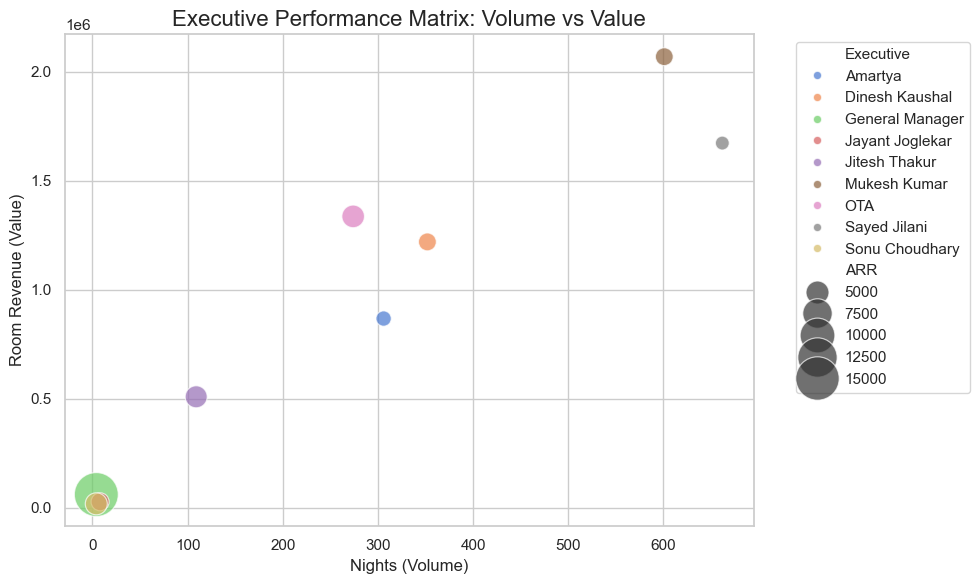

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_active, x='Nights', y='Room_Revenue', size='ARR', 
                hue='Executive', sizes=(100, 1000), alpha=0.7)

plt.title('Executive Performance Matrix: Volume vs Value', fontsize=16)
plt.xlabel('Nights (Volume)', fontsize=12)
plt.ylabel('Room Revenue (Value)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. EFFICIENCY: Small bubbles at higher revenue points indicate "High Efficiency" (Few nights but high income).
#### 2. STRATEGY: This chart helps in setting KPIs—some executives should focus on "Volume" to fill rooms, while others should focus on "ARR" to drive profit.

In [7]:
# Create a comprehensive summary table
summary = df_active[['Executive', 'Nights', 'Room_Revenue', 'ARR', 'Revenue_Pct']].sort_values(by='Room_Revenue', ascending=False)
summary.to_csv('Sales_Executive_Performance_Summary.csv', index=False)

print("Full analysis complete. Summary of top 5 executives:")
summary.head(5)

Full analysis complete. Summary of top 5 executives:


,Executive,Nights,Room_Revenue,ARR,Revenue_Pct
6,Mukesh Kumar,601.0,2069570.06,3443.54,26.58
9,Sayed Jilani,662.0,1673301.65,2527.65,21.49
7,OTA,274.0,1337110.04,4879.96,17.17
2,Dinesh Kaushal,352.0,1220074.72,3466.12,15.67
1,Amartya,306.0,868450.00,2838.07,11.15


#### Summary of Key Business Findings:
#### 1. The Powerhouse: Mukesh Kumar is the standout performer, contributing the highest number of nights (601) and significant revenue. His portfolio likely contains the hotel's core anchor accounts.

#### 2. Yield vs. Volume: There is a clear trade-off visible in the data. The executives bringing in the most revenue/nights (Mukesh, Dinesh) have lower ARRs (~2800-3400), while those with less volume (Jitesh, General Manager) are securing much higher rates (~4600-15000).

#### 3. KPI Optimization: For future months, the hotel can balance its strategy by tasking high-volume executives to increase their ARR by even 5-10%, which would result in a massive revenue jump due to their high night count.

#### 4. Team Balance: The data shows a "heavy top" where a few people do most of the heavy lifting. Cross-training or account redistribution could help in building a more balanced sales funnel.